![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far.

In [2]:
# Read CSV
data = pd.read_csv("../../DATA/Sacramentorealestatetransactions.csv")

In [3]:
data.shape

(985, 12)

In [4]:
# Head
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
# Tail
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
# Check Null Values
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [8]:
# Zip is categorical value, should be string
data['zip'] = data['zip'].astype(str)

In [9]:
# Describe Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [10]:
# Got min value 0 for beds, baths, sqft which does not seem correct.

In [11]:
data[data['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


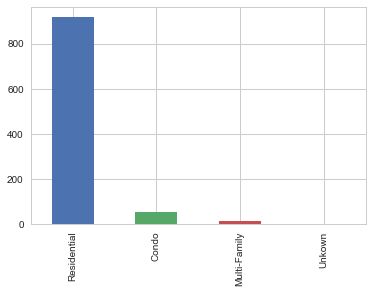

In [12]:
# Types of Data
data['type'].value_counts().plot(kind='bar')

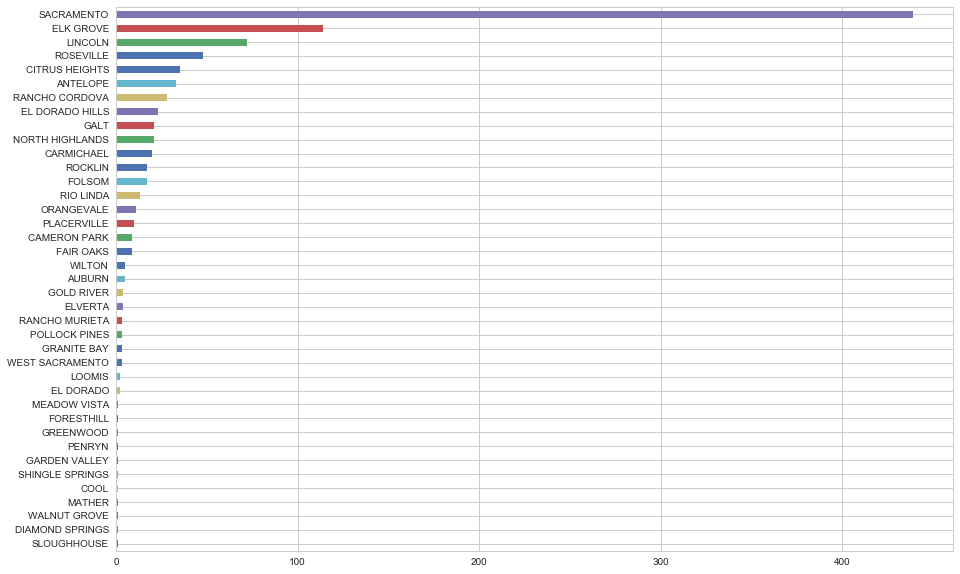

In [13]:
# City
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [14]:
# Create another type which have 0 beds, baths, sqft

In [15]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'

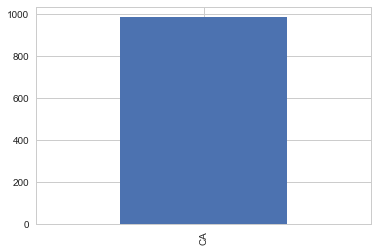

In [16]:
data['state'].value_counts().plot(kind='bar');

In [17]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [18]:
# ANSWER

## Price is target varaible. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

In [19]:
# ANSWER

## beds
## baths
## sqft
## Type

In [20]:
# Target Variable
Y = data['price']

In [21]:
# Predictor Variable
X = data['beds']

In [22]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

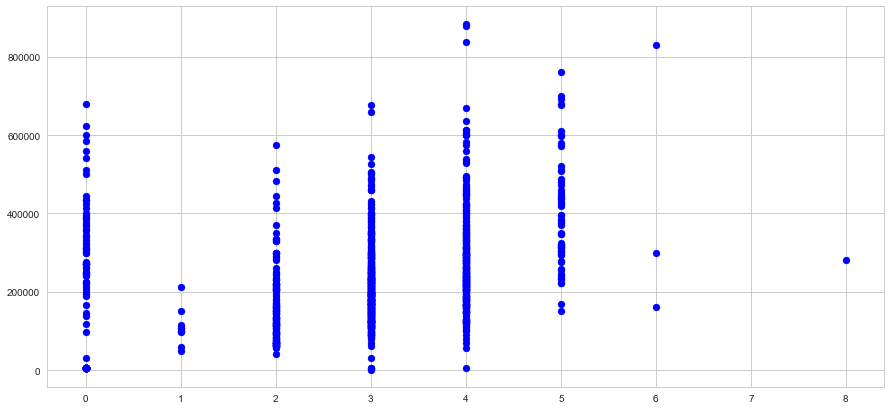

In [23]:
# beds
draw_scatter_plot(data['beds'], data['price'])

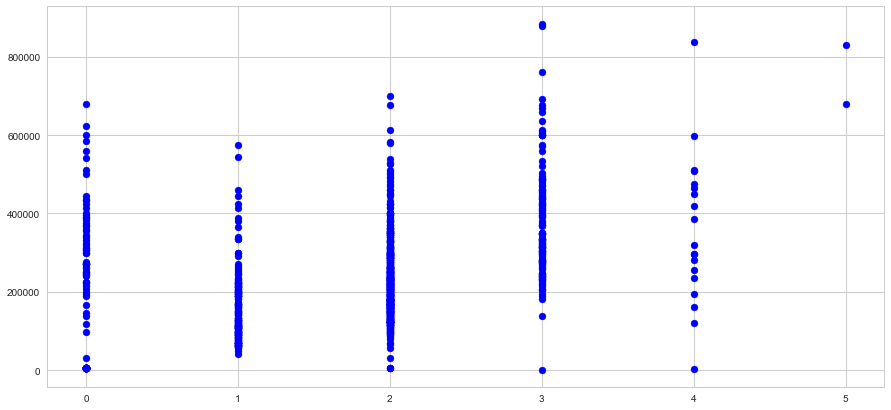

In [24]:
# beds
draw_scatter_plot(data['baths'], data['price'])

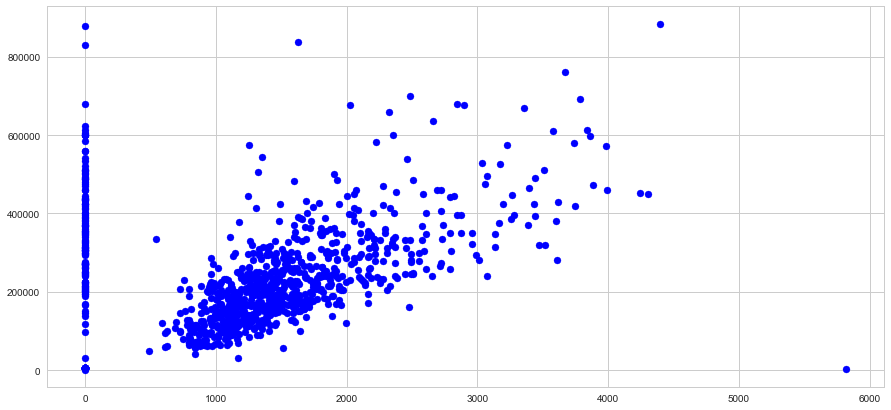

In [25]:
# beds
draw_scatter_plot(data['sq__ft'], data['price'])

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [26]:
# ANSWER
data.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [27]:
### sq_ft is the best predictor.
### sqft got stong relationship with beds, baths

#### 2.3 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [28]:
# ANSWER
## Mean of Price
data['y_hat'] = data['price'].mean()

In [29]:
X = data['sq__ft']
Y = data['price']
Yhat = data['y_hat']

In [30]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

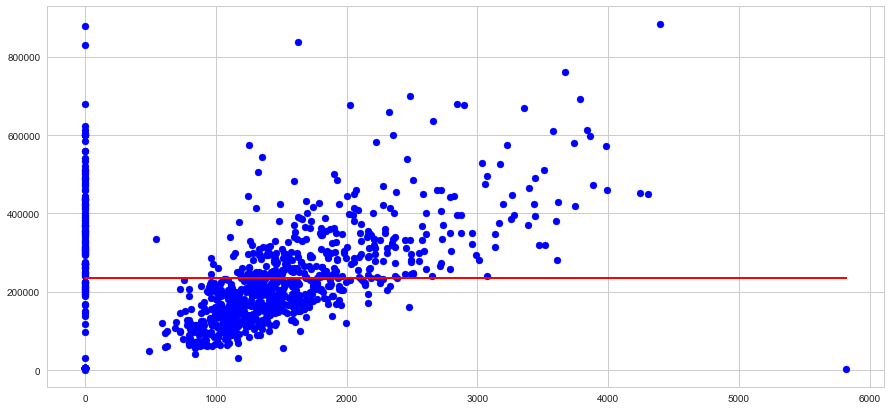

In [31]:
draw_plot(X, Y, Yhat)

#### 2. 4 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [32]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891476

#### 2.5  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

##### 2.5 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [33]:
X = data['sq__ft']
Y = data['price']

##### 2.5.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [34]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [35]:
beta_1 = calculate_beta_1(X, Y)
beta_1

54.158639688530755

##### 2.5.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [36]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [37]:
beta_0 = calculate_beta_0(X, Y)
beta_0

162930.16140699777

##### 2.4.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [38]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [39]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
5      223696.155138
6      222721.299623
7      226674.880320
8      213893.441354
9      224995.962490
10     212160.364884
11     232740.647966
12     210102.336576
13     218171.973889
14     218280.291169
15     224346.058814
16     208640.053304
17     205986.279959
18     194775.441544
19     236369.276825
20     223479.520579
21     234906.993553
22     230086.874621
23     249638.143548
24     211727.095766
25     221854.761388
26     215084.931427
27     223533.679218
28     237669.084177
29     230520.143738
           ...      
955    237181.656420
956    233877.979399
957    231278.364694
958    257166.194465
959    245088.817814
960    241460.188955
961    239618.795206
962    211023.033450
963    264856.721301
964    233444.710281
965    239727.112485
966    162930.161407
967    234365.407156
968    258790.953656
969    251046.268180
970    162930.161407
971    219255

##### 2.5.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [40]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [41]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
5      133775.155138
6      131826.299623
7      135672.880320
8      118988.441354
9      126058.962490
10     111851.364884
11     126490.647966
12     103250.336576
13     110669.973889
14     109530.291169
15     113646.058814
16      95377.053304
17      89736.279959
18      74775.441544
19     114739.276825
20     101479.520579
21     112224.993553
22     107086.874621
23     125538.143548
24      86727.095766
25      95214.761388
26      87803.931427
27      94533.679218
28     106469.084177
29      98520.143738
           ...      
955     28931.656420
956     25559.979399
957     21931.364694
958     45666.194465
959     33088.817814
960     28460.188955
961     23618.795206
962      4997.966550
963     45856.721301
964     13650.710281
965     19727.112485
966     57069.838593
967     14365.407156
968     38790.953656
969     28046.268180
970     61069.838593
971      4744

##### 2.5.D Find R-Square

Write a function to calculate R- Square value.

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [42]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [43]:
def calculate_residula_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [44]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residula_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [45]:
calculate_r_square(Y, np.mean(Y))

0.0

In [46]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

##### 2.5.G [BONUS] Draw Plot of Predicted Line

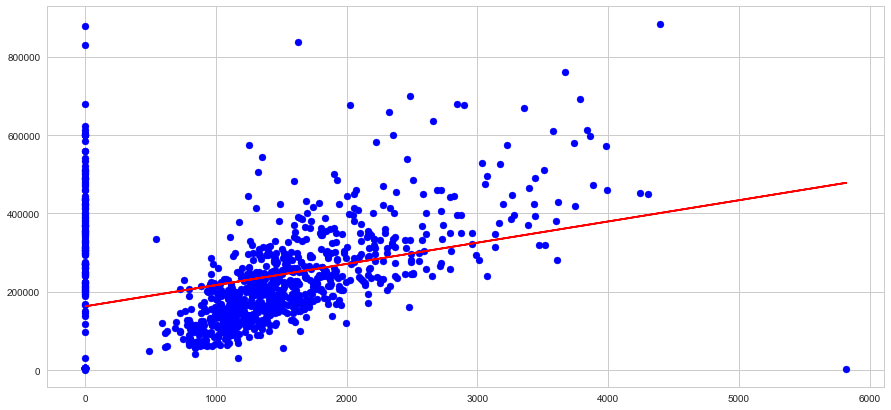

In [47]:
draw_plot(X, Y, Yhat)

##### 2.5.G [BONUS] Draw Plot of Predicted Line With Resudals

In [48]:
data['Yhat'] = Yhat

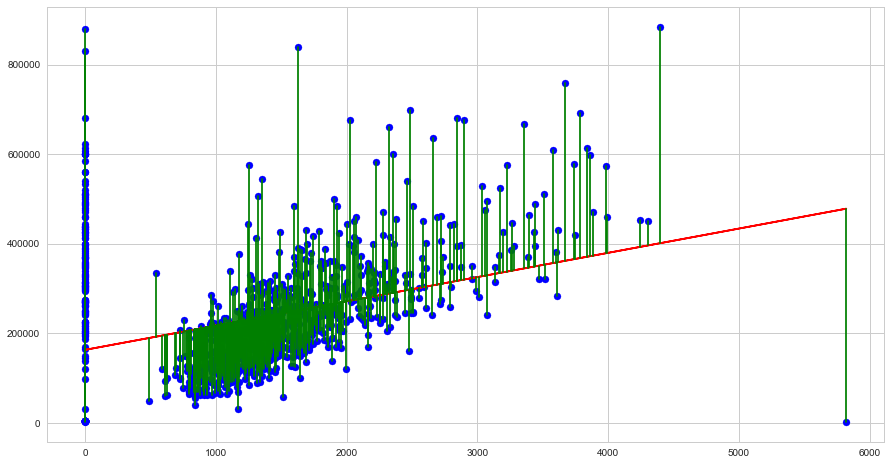

In [49]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [50]:
# ANSWER
xpred = 1204
xpred

1204

In [51]:
beta_0

162930.16140699777

In [52]:
beta_1

54.158639688530755

In [53]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888

#### 2.6 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [54]:
from sklearn.linear_model import LinearRegression

In [66]:
# ANSWER

X = data[['sq__ft']]
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.6.2 Find R Score

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 

The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse).

In [67]:
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [68]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library

In [69]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [70]:
## Check training/test data

# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'pandas.core.frame.DataFrame'>
X_train has %d rows (788, 1)

Sample of X_train__________________________________________________
     sq__ft
27     1119
358    1014
22     1240
245    1776
631    1272
849    3173
190     994
635    1890
648    2475
430    1856

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (788,)

Sample of y_train__________________________________________________
27     129000
358    113000
22     123000
245    234000
631    124413
849    525000
190    142500
635    137721
648    159900
430    215000
Name: price, dtype: int64


In [60]:
## Check training/test data

# About test
print('X_train is a %s' % type(X_test))
print('X_train has %d rows', X_test.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_train is a %s' % type(y_test))
print('y_train has %d rows', y_test.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_test[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows (197, 1)

Sample of X_train__________________________________________________
[[1216]
 [   0]
 [1676]
 [2309]
 [ 958]
 [1522]
 [2054]
 [   0]
 [2258]
 [1386]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (197,)

Sample of y_train__________________________________________________
242    230000
754    270000
392    155000
118    311000
368    120000
237    225000
138    381942
865      1551
725    232500
683    191250
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [61]:
# ANSWER

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[53.41878847] 164608.33622269018


In [62]:
linreg.score(X_test, y_test)

0.13401580989683193

#### 3.4 Using your model predict price of a house

Let's assume we have house which have 1000 square feet. What is the predicted value of that house? Use your model.

In [71]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1000

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  217088.8010955285


In [72]:
# ANSWER
x = [[1000]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  217088.8010955285
